# Image Processing

In [1]:
import numpy as np#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense,Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#setting parameter for Image Data agumentation to the training data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
#Image Data agumentation to the testing data
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(
    r'C:/Users/HARIHARAN D/Desktop/Project/Dataset/TRAIN_SET',
    target_size=(64, 64),batch_size=113,color_mode='rgb',class_mode='sparse')

Found 2626 images belonging to 5 classes.


In [5]:
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(
    r'C:/Users/HARIHARAN D/Desktop/Project/Dataset/TEST_SET',
    target_size=(64, 64),batch_size=113,color_mode='rgb',class_mode='sparse')

Found 1055 images belonging to 5 classes.


In [6]:
print(x_train.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [7]:
print(x_test.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


# Model Building

In [8]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [9]:
# Initializing the CNN
classifier = Sequential()

In [10]:
# First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))

In [12]:
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
# Flattening the layers
classifier.add(Flatten())

In [14]:
# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=113, activation='softmax')) # softmax for more than 2
classifier.summary()#summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [15]:
# Compiling the CNN
# categorical_crossentropy for more than 2
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
classifier.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=100, validation_data=x_test,validation_steps = len(x_test))# No of images in test set

C:\Users\HARIHARAN D\AppData\Local\Temp\ipykernel_876\2719268462.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/100
24/24 [==============================] - 85s 4s/step - loss: 1.1166 - accuracy: 0.6664 - val_loss: 0.5713 - val_accuracy: 0.7915
Epoch 2/100
24/24 [==============================] - 56s 2s/step - loss: 0.1345 - accuracy: 0.9680 - val_loss: 0.1244 - val_accuracy: 0.9687
Epoch 3/100
24/24 [==============================] - 58s 2s/step - loss: 0.0301 - accuracy: 0.9950 - val_loss: 0.0950 - val_accuracy: 0.9649
Epoch 4/100
24/24 [==============================] - 54s 2s/step - loss: 0.0092 - accuracy: 0.9992 - val_loss: 0.0305 - val_accuracy: 0.9839
Epoch 5/100
24/24 [==============================] - 58s 2s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9327
Epoch 6/100
24/24 [==============================] - 54s 2s/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.1262 - val_accuracy: 0.9308
Epoch 7/100
24/24 [==============================] - 55s 2s/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0856 - val_accuracy: 0.9403
Epoch 8/100
2

24/24 [==============================] - 55s 2s/step - loss: 4.2602e-05 - accuracy: 1.0000 - val_loss: 0.0616 - val_accuracy: 0.9773
Epoch 58/100
24/24 [==============================] - 57s 2s/step - loss: 3.1881e-05 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9886
Epoch 59/100
24/24 [==============================] - 55s 2s/step - loss: 3.0146e-05 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9820
Epoch 60/100
24/24 [==============================] - 57s 2s/step - loss: 1.6260e-05 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9810
Epoch 61/100
24/24 [==============================] - 56s 2s/step - loss: 1.9445e-05 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 0.9820
Epoch 62/100
24/24 [==============================] - 56s 2s/step - loss: 2.0714e-05 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 0.9829
Epoch 63/100
24/24 [==============================] - 55s 2s/step - loss: 1.6111e-05 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy

In [17]:
# Save the model
classifier.save('nutrition.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [19]:
img=image.load_img(r"C:\Users\HARIHARAN D\Desktop\Project\Dataset\photo-1589820296156-2454bb8a6ad1.jpg",target_size=(64,64))

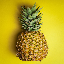

In [20]:
img

In [21]:
x=image.img_to_array(img)#conversion image into array

In [22]:
x

array([[[184., 158.,   3.],
        [186., 160.,   3.],
        [183., 157.,   0.],
        ...,
        [203., 182.,   1.],
        [204., 181.,   5.],
        [204., 181.,   3.]],

       [[184., 158.,   1.],
        [186., 160.,   1.],
        [188., 162.,   3.],
        ...,
        [205., 183.,   2.],
        [204., 182.,   1.],
        [205., 183.,   1.]],

       [[187., 159.,   0.],
        [190., 162.,   3.],
        [191., 163.,   2.],
        ...,
        [207., 185.,   3.],
        [206., 184.,   2.],
        [206., 186.,   1.]],

       ...,

       [[210., 191.,   1.],
        [211., 192.,   2.],
        [214., 194.,   3.],
        ...,
        [225., 217.,  57.],
        [224., 216.,  53.],
        [224., 216.,  56.]],

       [[211., 190.,   3.],
        [211., 190.,   1.],
        [212., 193.,   2.],
        ...,
        [225., 217.,  54.],
        [223., 218.,  56.],
        [222., 216.,  56.]],

       [[211., 192.,   2.],
        [212., 193.,   2.],
        [211., 1

In [23]:
x.ndim

3

In [24]:
x=np.expand_dims(x,axis=0) #expand the dimension

In [25]:
x.ndim

4

In [26]:
pred = classifier.predict(x)

1/1 [==============================] - 4s 4s/step


In [27]:
pred

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [28]:
labels=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']

In [29]:
labels[np.argmax(pred)]

'BANANA'